In [1]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
# Define the coordinates
# coords = [(40.3130, -124.5412),
#           (39.7072, -123.8377),
#           (38.7883, -123.7060),
#           (38.7883, -120.0751),
#           (41.0959, -120.2123),
#           (41.0794, -124.1459),
#           (40.3130, -124.5412)]

# L = len(coords)
# coordsRev = [(coords[L-i-1][1], coords[L-i-1][0]) for i,k in enumerate(coords)]

# # Create the polygon geometry
# #polygon = Polygon(coords)

# polygon = Polygon(coordsRev)


# # Create a GeoDataFrame with the polygon geometry
# gdf = gpd.GeoDataFrame(geometry=[polygon])

# # Save the GeoDataFrame as a shapefile
# output_shapefile = 'output_shapefile.shp'
# gdf.to_file(output_shapefile, driver='ESRI Shapefile')


In [2]:
# import matplotlib.pyplot as plt
# from matplotlib.patches import Polygon

# poly = Polygon(coordsRev, closed=True)

# # Create a figure and axis
# fig, ax = plt.subplots()

# # Add the polygon to the axis
# ax.add_patch(poly)

# # Set the aspect ratio and limits
# ax.set_aspect('equal')
# ax.set_xlim(-125, -119)
# ax.set_ylim(38.5, 41.5)

# # Set labels and title
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# ax.set_title('Polygon Example')

# # Show the plot
# plt.show()


In [3]:
# import matplotlib.pyplot as plt


# # Extract x and y coordinates from the vertices
# x, y = zip(*coordsRev)

# # Plot the line segments joining the vertices
# plt.plot(x, y, marker='o', linestyle='-', color='b', alpha=.4)

# # Set the aspect ratio and limits
# plt.gca().set_aspect('equal')
# plt.xlim(-125, -119)
# plt.ylim(38.5, 41.5)

# # Set labels and title
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Polygon Line Segments')
# s = [1+10*i for i in range(len(x))]
# plt.scatter(x, y, color='r', s=s)

# # Show the plot
# plt.show()


In [4]:
#nm = gpd.read_file('fe_2007_35_bdy_00.shp')
#print(nm.to_dict()['geometry'][0])

In [5]:
# out = gpd.read_file('output_shapefile.shp')
# print(out.to_dict()['geometry'][0])

In [11]:

ModisOutlineParadise = np.load('ModisOutlineParadise.npy')
ModisOutlineNorth = np.load('ModisOutlineNorth.npy')
ModisOutlineWest = np.load('ModisOutlineWest.npy' )

In [12]:
def point_in_polygon(point, polygon):
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xints = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside

In [13]:
# polygon = [(0, 0), (0, 4), (4, 4), (4, 0)]
# point = (2, 2)

# if point_in_polygon(point, polygon):
#     print("The point is inside the polygon.")
# else:
#     print("The point is outside the polygon.")


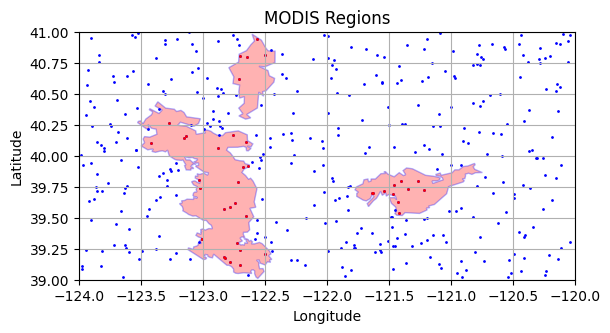

In [42]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as GPoly

N_rnd = 400
np.random.seed(42)


polyP = Polygon(ModisOutlineParadise, closed=True,  fc=(1,0,0,0.3),  ec=(0,0,1,0.3))
polyW = Polygon(ModisOutlineWest,     closed=True,  fc=(1,0,0,0.3), ec=(0,0,1,0.3))
polyN = Polygon(ModisOutlineNorth,    closed=True,  fc=(1,0,0,0.3), ec=(0,0,1,0.3))

fig, ax = plt.subplots()

ax.add_patch(polyP)
ax.add_patch(polyN)
ax.add_patch(polyW)

# Plot the line segments joining the vertices

xp, yp = zip(*ModisOutlineParadise)
xw, yw = zip(*ModisOutlineWest)
xn, yn = zip(*ModisOutlineNorth)
xmin = min(min(xp),min(xw),min(xn))
xmax = max(max(xp),max(xw),max(xn))

ymin = min(min(yp),min(yw),min(yn))
ymax = max(max(yp),max(yw),max(yn))

xrnd = 4*np.random.sample(N_rnd) - 124
yrnd = 2*np.random.sample(N_rnd) + 39

Modis = np.vstack([ModisOutlineWest, ModisOutlineNorth, ModisOutlineParadise])
polyWG = GPoly(Modis)
prnd = np.array(list(zip(xrnd, yrnd)))
plt.scatter(xrnd, yrnd, s= 1, c='b')

test = []
for point in prnd:
    test.append(point_in_polygon(point, ModisOutlineWest))
test = np.array(test)
plt.scatter(xrnd[test==True], yrnd[test==True], s= 1, c='r')

test = []
for point in prnd:
    test.append(point_in_polygon(point, ModisOutlineNorth))
test = np.array(test)
plt.scatter(xrnd[test==True], yrnd[test==True], s= 1, c='r')

test = []
for point in prnd:
    test.append(point_in_polygon(point, ModisOutlineParadise))
test = np.array(test)
plt.scatter(xrnd[test==True], yrnd[test==True], s= 1, c='r')


# Set the aspect ratio and limits
plt.gca().set_aspect('equal')
plt.xlim(-124, -120)
plt.ylim(39.0, 41.0)
plt.grid()
# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('MODIS Regions')
#s = [1+10*i for i in range(len(x))]

# Show the plot
plt.show()


Number in Paradise 11
Number in West 25
Number in North 5
Number of Fire Samples 41


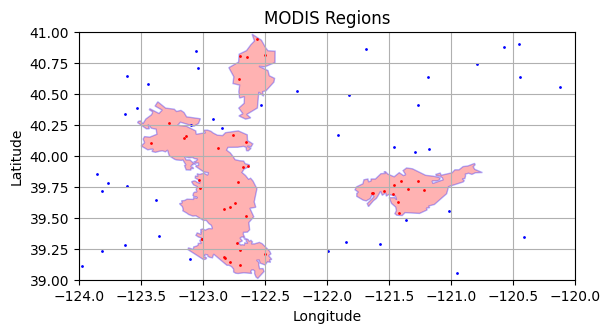

In [43]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as GPoly
import random

fire = [coord for coord in prnd if point_in_polygon(coord, ModisOutlineParadise)]

polyP = Polygon(ModisOutlineParadise, closed=True,  fc=(1,0,0,0.3),  ec=(0,0,1,0.3))
polyW = Polygon(ModisOutlineWest,     closed=True,  fc=(1,0,0,0.3), ec=(0,0,1,0.3))
polyN = Polygon(ModisOutlineNorth,    closed=True,  fc=(1,0,0,0.3), ec=(0,0,1,0.3))

fig, ax = plt.subplots()

ax.add_patch(polyP)
ax.add_patch(polyN)
ax.add_patch(polyW)

NumFireSample = 0
fireP = [coord for coord in prnd if point_in_polygon(coord, ModisOutlineParadise)]
x,y = list(zip(*fireP))
print("Number in Paradise", len(fireP))
plt.scatter(x, y, s= 1, c='r')
NumFireSample += len(fireP)

fireW = [coord for coord in prnd if point_in_polygon(coord, ModisOutlineWest)]
x,y = list(zip(*fireW))
print("Number in West", len(fireW))
NumFireSample += len(fireW)
plt.scatter(x, y, s= 1, c='r')

fireN = [coord for coord in prnd if point_in_polygon(coord, ModisOutlineNorth)]
x,y = list(zip(*fireN))
print("Number in North", len(fireN))
NumFireSample += len(fireN)
plt.scatter(x, y, s= 1, c='r')
print("Number of Fire Samples", NumFireSample)

nofire = [coord for coord in prnd if 
                 (not point_in_polygon(coord, ModisOutlineParadise) 
                  and not point_in_polygon(coord, ModisOutlineWest) 
                  and not point_in_polygon(coord, ModisOutlineNorth))]

nofireSample = random.sample(nofire, NumFireSample)
#x,y = list(zip(*nofire))
x,y = list(zip(*nofireSample))
plt.scatter(x, y, s= 1, c='b')


# Set the aspect ratio and limits
plt.gca().set_aspect('equal')
plt.xlim(-124, -120)
plt.ylim(39.0, 41.0)
plt.grid()
# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('MODIS Regions')

# Show the plot
plt.show()


In [45]:
# np.save('FireParadiseSample.npy', np.array(fireP))
# np.save('FireWestSample.npy', np.array(fireW))
# np.save('FireNorthSample.npy', np.array(fireN))
# np.save('NoFireSample.npy', np.array(nofire))

In [68]:
[(i, c) for i,c in enumerate(nofireSample)]

[(0, array([-123.60866336,   39.75388886])),
 (1, array([-123.81598943,   39.71766097])),
 (2, array([-123.62407224,   40.33728644])),
 (3, array([-123.85060725,   39.85087288])),
 (4, array([-123.97219148,   39.11275099])),
 (5, array([-120.12166149,   40.55429383])),
 (6, array([-121.26306789,   40.41248445])),
 (7, array([-120.41155896,   39.34463974])),
 (8, array([-121.45435835,   40.07219273])),
 (9, array([-123.10292276,   39.16351806])),
 (10, array([-120.79121208,   40.73719826])),
 (11, array([-121.56982059,   39.28598336])),
 (12, array([-123.81419835,   39.23413403])),
 (13, array([-121.81753284,   40.48789259])),
 (14, array([-121.98745497,   39.23379608])),
 (15, array([-120.45114903,   40.90082297])),
 (16, array([-123.76766555,   39.77840336])),
 (17, array([-123.04175244,   40.704363  ])),
 (18, array([-122.91460387,   40.2984206 ])),
 (19, array([-123.35348514,   39.35402097])),
 (20, array([-123.60931154,   40.64372012])),
 (21, array([-121.68687944,   40.85875198]))

In [70]:
[f"{i} W{abs(coord[0])},N{coord[1]}" for i,coord in enumerate(nofireSample)], len(nofireSample)

(['0 W123.608663357396,N39.75388885884981',
  '1 W123.81598943191298,N39.717660968247',
  '2 W123.62407224063652,N40.33728643984886',
  '3 W123.85060724500315,N39.85087287723283',
  '4 W123.97219147787524,N39.11275099330185',
  '5 W120.12166148894177,N40.55429383185487',
  '6 W121.26306789395137,N40.412484454312995',
  '7 W120.4115589601897,N39.34463974240326',
  '8 W121.45435835494487,N40.072192732688244',
  '9 W123.10292276215776,N39.16351806389774',
  '10 W120.79121207698384,N40.73719825637892',
  '11 W121.56982059239425,N39.285983364105675',
  '12 W123.81419834912,N39.23413403285521',
  '13 W121.81753284273626,N40.48789258514535',
  '14 W121.98745496567965,N39.23379608141673',
  '15 W120.45114902969469,N40.900822968153115',
  '16 W123.7676655513272,N39.77840335746833',
  '17 W123.04175243733211,N40.70436300063708',
  '18 W122.91460387290442,N40.29842060423213',
  '19 W123.35348514362154,N39.35402096855349',
  '20 W123.60931154397447,N40.64372011858071',
  '21 W121.6868794360153,N40